**ORE SPESE SU QUESTO HOMEWORK**\
- 2 ore il 14-12
- 1 ora il 15-12
- 2 ore il 16-12
- 2 ore il 20-12
- 3 ore il 22-12
- 2 ore il 23-12
- 3 ore il 24-12
- 4 ore il 26-12
- 2 ore l 27-12
- 1 ora il 28-12

# TO DO LIST:
- cancella le prime librerie importate a fine homewrok, stanno li solo per comodita
- sistemare i pesi nel grafo 1


# CONTROLLATO TUTTO FINO A:
- fun 7 da iniziare , ricontrolla pero la parte di graphs set up


In [ ]:
#DA CANCELLARE

import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.spatial.distance import cdist
from random import randint
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import defaultdict
from operator import itemgetter
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import MiniBatchKMeans
from sklearn_extra.robust import RobustWeightedKMeans

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import OrderedDict
from itertools import islice
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

## Let's import the datasets
**HERO-NETWORK:**\
It contains the network of heroes who have appeared together in the comics.

In [97]:
dfheros = pd.read_csv(r'C:\Users\gianl\Documents\Università_4°anno(2022-2023\ADM\HOMEWORK\HOMEWORK 5\hero-network.csv')

In [4]:
dfheros.head(5)

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


In [5]:
dfheros.shape

(574467, 2)

**EDGES:**\
It contains two columns (hero, comic), indicating which comics the heroes appear in.

In [6]:
dfedges = pd.read_csv(r'C:\Users\gianl\Documents\Università_4°anno(2022-2023\ADM\HOMEWORK\HOMEWORK 5\edges.csv')

In [7]:
dfedges.head(5)

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251


In [8]:
dfedges.shape

(96104, 2)

**NODES:**\
It contains two columns (node, type), indicating the nodes' name and its type (comic, hero).

In [9]:
dfnodes = pd.read_csv(r'C:\Users\gianl\Documents\Università_4°anno(2022-2023\ADM\HOMEWORK\HOMEWORK 5\nodes.csv')

In [10]:
dfnodes.head(5)

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero


In [11]:
dfnodes.shape

(19090, 2)

# QUESTION 1: DATA

## DATA PREPROCESSING
### 1)

**1.1**

"Some heroes' names in 'hero-netowrk.csv' have extra spaces at the end of their names compared to their names in 'edges.csv'" :

- The following command gets the string of heroes inside column 'hero1' (in dataset heros) that have a space in the last position: '  '. Once we have these heroes, we edit the string by deleting the space in the last position.

In [98]:
for i in range(len(dfheros.hero1)):
    if dfheros.hero1[i][-1] == ' ':
        dfheros.hero1[i]= dfheros.hero1[i][0:-1]

**1.2**

Some heroes' names in 'hero-netowrk.csv' have an extra '/' at the end of their names compared to their names in 'edges.csv'.

- We could do the same thing of above, but we noticed that in the column hero (dataset edges) we have heros which have in the last position a slash: '/'. So we can't just remove all '/' in last position in hero (dataset edges) otherwise we will end up in the opposite situation, i.e. heroes that have an extra '/' in the heroes dataset but don't have it in the edges dataset. Instead we should remove only the heroes that within hero1 (in dataset heros) have a slash in the last position, while in hero (dataset edges) they don't.

- However, to make things easier, we decided to remove the / in the last position in all heroes even those that are normally registered with the / in the last position (for example 8-BALL/ it is normally registered with the / in the last position because it has it in both the heros and edges datasets, but to make things easier we will remove the / even for 8-BALL/ in both dataset)

- The following query, therefore, removes the / in last position (to whoever has it) to all heroes in 'hero1' (dataset heros) and in 'hero' (dataset edges):

In [99]:
#for the dataset 'dfheros' in column 'hero1'
for i in range(len(dfheros.hero1)):
    if dfheros.hero1[i][-1] == '/':
        dfheros.hero1[i]= dfheros.hero1[i][0:-1]
        
#for the dataset 'dfheros' in column 'hero2'
for i in range(len(dfheros.hero2)):
    if dfheros.hero2[i][-1] == '/':
        dfheros.hero2[i]= dfheros.hero2[i][0:-1]
        
#for the dataset 'dfedges' in column 'hero'
for i in range(len(dfedges.hero)):
    if dfedges.hero[i][-1] == '/':
        dfedges.hero[i]= dfedges.hero[i][0:-1]

**1.3**

The hero name 'SPIDER-MAN/PETER PARKER' in 'edges.csv' has been changed to 'SPIDER-MAN/PETER PAR' in 'hero-network.csv' due to a string length limit in 'hero-network.csv'

We can see inside the dataset edges there are 1577 times the name 'SPIDER-MAN/PETER PARKER' in the column 'hero'.

In [14]:
dfedges[dfedges.hero == 'SPIDER-MAN/PETER PARKER'].shape

(1577, 2)

In order to avoid the problem of having two different name for the same hero in two different dataset, we decided to change inside the dataset edges, the name of the hero 'SPIDER-MAN/PETER PARKER' in 'SPIDER-MAN/PETER PAR'.

In [15]:
dfedges.hero = dfedges.hero.replace('SPIDER-MAN/PETER PARKER', 'SPIDER-MAN/PETER PAR')

Altought before were 1577 rows, now we can see that 'SPIDER-MAN/PETER PARKER' doesn't appear anymore.

In [16]:
dfedges[dfedges.hero == 'SPIDER-MAN/PETER PARKER'].shape

(0, 2)

### 2)

Some entries in the 'hero-network.csv' have the same hero in both columns. In the graph, these entries form a self-loop. Because a self-loop makes no sense in this network, you can safely remove those from the dataset.

- We can observe from the following cell that the rows we need to delete are 2232.

In [17]:
counter = 0
for i in range(len(dfheros.hero1)):
    if dfheros.hero1[i] == dfheros.hero2[i]:
        counter += 1
print('The number of total rows are: ', len(dfheros), "\nInstead, the number of rows that have the same hero in 'hero1' and 'hero2' are: ", counter)

The number of total rows are:  574467 
Instead, the number of rows that have the same hero in 'hero1' and 'hero2' are:  2232


- The following code iterates through the heros dataframe, if it encounters a row that has the same name in 'hero1' and 'hero2' then it deletes that row.

In [18]:
for i in range(len(dfheros.hero1)):
    if dfheros.hero1[i] == dfheros.hero2[i]:
        dfheros = dfheros.drop(i)

- Let's verify that 2232 rows have actually been deleted!

- Before we had a length of 574467, subtracting 2232 from it, we should obtain that the length of the dataframe is now equal to 572235:

In [19]:
len(dfheros)

572235

## GRAPHS SETUP
### 1)

- An edge between two heroes can be found if they have appeared in the same comic together. DIRE QUALCOSA SUI PESI!!!! Let's find all edges

In [20]:
#SISTEMARE I PESI, NON CAPISCO COME CAZZO DOBBIAMO FARLI, LEGGI ANCHE SLACK NEL CASO
edges = dfheros.groupby(['hero1', 'hero2']).size().reset_index(name='weight')

# crea il grafo
G1 = nx.from_pandas_edgelist(edges, 'hero1', 'hero2', edge_attr='weight')

In [27]:
warnings.filterwarnings("ignore", category=DeprecationWarning) #this command is used to don't visualize the warnings
nx.info(G1)

'Graph with 6947 nodes and 181383 edges'

In [22]:
for u, v, d in G1.edges(data=True):
    if (d['weight']) == 220:
        print(f"L'arco ({u}, {v}) ha peso {d['weight']}")

L'arco (CAPTAIN AMERICA, IRON MAN/TONY STARK ) ha peso 220


### 2)

- The following graph has all heroes and comics as nodes, taken from the "node" column of the "dfnodes" dataset. Here there will not be edges connecting two heroes or two comics together, but just edges connecting hero and comic. A hero is connected by a edge to the comic only if that hero has appeared in that specific comic.

In [23]:
G2 = nx.Graph()
G2 = nx.from_pandas_edgelist(dfedges, 'comic', 'hero')

# we add the type of each node, hero or comic (we will need in functionality 1)for index, row in dfedges.iterrows():
G2.add_node(row['hero'], type='hero')
G2.add_node(row['comic'], type='comic')

In [24]:
warnings.filterwarnings("ignore", category=DeprecationWarning) #this command is used to hide the warnings
nx.info(G2)

'Graph with 19087 nodes and 96104 edges'

# QUESTION 2: BACKEND IMPLEMENTATION

## Functionality 1 - extract the graph's features

**Top N heroes**: The top N heroes who have appeared in the most number of comics.

In [25]:
def top_N_heroes(df, N = None):
    if N == None:
        N = len(df)
    
    # group by 'hero' and count the number of comics where each hero has appeared
    df_counts = df.groupby('hero').comic.count().reset_index(name='count')
    df_counts = df_counts.sort_values(by='count', ascending=False)
    
    # take the N heroes who have appeared in the most number of comics
    top_N = df_counts[:N]
    
    # names of top N heroes
    names_topN = top_N['hero']
    
    return list(names_topN)

#### F1.1 The number of nodes in the network (if type 2, report for both node types)

- The following function takes as input the graph and the type of graph, if the type of graph is 1, it returns the number of total nodes, if instead the type of graph is 2, it returns the number of total nodes that refer to a hero and the number of total nodes that refer to a comic.

In [100]:
def nodes(graph, graph_type):
    # if graph type is equal to 1, return the total number of nodes
    if graph_type == 1:
        return (f"The graph has {graph.number_of_nodes()} nodes")
        
    #if instead graph type is equal to 2, count all nodes that refer to a hero and all nodes that refer to a comic and return them.
    else:   
        attributes = nx.get_node_attributes(graph, 'type')
        count_hero = list(attributes.values()).count('hero')
        count_comic = list(attributes.values()).count('comic')
        return (f"The graph has {count_hero} nodes referring to heros.")
        return (f"The graph has {count_comic} nodes referring to comics.")

#### F1.2 The number of collaborations of each superhero with the others (only if type 1)

- The following function takes as input the graph, the type of graph and the number of top N heroes to be considered and outputs the number of collaborations of each hero with the others.

In [105]:
def collaborations(graph, graph_type, N= None):
    # If graph type is equal to 2 we can't compute it.
    if graph_type == 2:
        return ("Sorry, I can't compute the number of collaborations of each superhero with the others for type 2 graphs, only for type 1 graphs.")
        
    else:
        
        # Create a new empty dictionary
        node_degrees = {}
    
        # Compute the degree of each node and add it to the dictionary
        for node in graph:
            degree = graph.degree(node)
            node_degrees[node] = degree
            
        # Sort the dictionary by its values
        sorted_dict = dict(sorted(node_degrees.items(), key=lambda x: x[1], reverse=True))
        
        
        # So far we have created an ordered dictionary where we have heroes as keys and as values the number of collaborations
        # they have. How ever we want a dictionary sorted by top N heroes. Let's do it!
        
        
        # Create a new empty dictionary
        dizionario_filtrato = {}
        
        # Go through the list of top N heroes and add hero after hero to the dictionary, with its corresponding value of collaborations.
        for elemento in top_N_heroes(dfedges, N = None):
            if elemento in sorted_dict:
                dizionario_filtrato[elemento] = sorted_dict[elemento]
                
        # Return the first N element of the dictionary (which are the top N heroes)  
        return dict(islice(dizionario_filtrato.items(), N))

**F1.3 The number of heroes that have appeared in each comic (only if type 2)**

- The following function takes as input the graph, the type of graph and an integer N and returns as output an ordered dictionary of length N, in which there are comics as key and as values the number of heroes appeared in that comic. 


- The decision to give N as input (which in the final function 'features' actually indicates the number of top N heroes) is due to the fact that taking the whole dictionary (and not just the first N elements), the function returns a dictionary of length 12651, and in terms of visualization for the final function it wasn't confortable.

In [128]:
def heros_per_comic(graph, graph_type, N= None):
    # If graph type is equal to 1 we can't compute it.
    if graph_type == 1:
        return ("Sorry, I can't compute the number of heroes that have appeared in each comic for type 1 graphs, only for type 2 graphs.")
    
    else:
        # Create a dictionary that has the node as the key and the type of that node as the value (comic or hero)
        attributes = nx.get_node_attributes(graph, 'type')
        
        # Crea filtered_d, ovvero un dizionario che ha come elementi solo nodi di tipo 'comic'
        filtered_d = {k: v for k, v in attributes.items() if v != 'hero'}
        
        # Create a new empty dictionary
        final_d = {}
        
        # For each key in filtered_d (which would all be nodes of type comic), calculate the degree and add to the final_d 
        # dictionary that node as the key and the degree as the value
        for i in filtered_d:
            final_d[i] = graph.degree(i)
            
        # Sort the dictionary by its values
        sorted_d = dict(sorted(final_d.items(), key=lambda item: item[1], reverse = True))
        
        # Returns the first N elements of the dictionary
        return dict(islice(sorted_d.items(), N))

**F1.4 The network's density**

- In a network, density refers to the number of edges in the network compared to the total number of possible edges. A network with a high density has a large number of edges, while a network with a low density has few of them.


- To compute the density of a network, we need to use the following formula:
  - Density = (Number of edges in the network) / (Total number of possible edges)

In [129]:
def density(graph):
    # Compute the total number of nodes
    num_edges = graph.number_of_edges()
    # Compute the total number of edges
    num_possible_edges = (graph.number_of_nodes() * (graph.number_of_nodes() - 1)) / 2
    # Compute the density
    density = num_edges / num_possible_edges
    return round(density,4)

**F1.5 The network's degree distribution**

- The distribution degree of a graph is a measure of how often different degrees of nodes appear within the graph. The following function takes the graph as input and returns the degree distribution, i.e. a dictionary whose keys are the degrees of the nodes of the graph and as values it has the number of nodes within the graph that have that degree.

In [158]:
def distribution(graph):
  # Create an empty dictionary to count the number of nodes with each degree
  degree_count = {}

  # Iterate over the nodes of the graph
  for node in graph.nodes():
    # Get the degree of the current node using the degree method of NetworkX
    degree = graph.degree(node)

    # If the degree is not yet in the dictionary, add a new entry
    if degree not in degree_count:
        degree_count[degree] = 0

    # Increment the counter for the current degree
    degree_count[degree] += 1

  # Sort the dictionary by keys (the degrees of the nodes) in ascending order
  degree_count = sorted(degree_count.items(), key=lambda x: x[0])

  # Return the sorted dictionary
  return dict(degree_count)

**F1.6 The average degree of the network**

- The following function takes a graph as input and returns the average degree of that graph. The average degree would be the sum of all the degrees of the nodes, divided by how many nodes there are within the graph.

In [162]:
def average_degree(graph):
    # Initialize the total degree counter to zero
    total_degree = 0
  
    # Iterate over the nodes of the graph and add the degree of every node to the total degree counter
    for node in graph:
        total_degree += len(graph[node])
  
    # Divide the total degree by the number of nodes in the graph and return the rounded result
    return round(total_degree / len(graph))

**F1.7 The network's Hubs (hubs are nodes having degrees more extensive than the 95th percentile of the degree distribution)**

In [49]:
#cambia nomi ecc
def get_hubs(graph, percentile = 95):
    dist = distribution(graph)

    threshold = np.percentile(dist.degree, percentile)

    return list(dist[dist.degree >= threshold].node.values)

**F1.8 Whether the Network is sparse or dense**

In [50]:
def dense_or_sparse(graph):
    if density(graph) < 0.5:
        return 'Sparse'
    else:
        return 'Dense'

# **ADESSO CHE HO DEFINITO TUTTE LE FUNZIONI, FACCIAMO UN'UNICA FUNZIONE PER PLOTTARCI TUTTO QUANTO INSIEME**

In [68]:
def features(graph, graph_type, N = None):
    if (graph_type != 1) & (graph_type != 2):
        return 'The type of graph entered is no correct.'
    else:
        nodi = nodes(graph, graph_type)
        n_collaborations = collaborations(graph, graph_type, N)
        n_heros_each_comic = heros_per_comic(graph, graph_type, N)
        densità = density(graph)
        network_degree_distribution = degree_nodes(graph, N)
        average_degree = average_degre(graph)
        #hubs = get_hubs(graph, percentile = 95)
        dense_sparse = dense_or_sparse(graph)
    return nodi, n_collaborations, 'The number of heroes that have appeared in each comic are: ',  n_heros_each_comic, 'The density of the graph is ' + str(densità), 'The average degree of the network is ' + str(average_degree), 'The average degree of the network is ' + dense_sparse

In [69]:
features(G2, 2, 10)

('The graph has 6436 nodes referring to heros.',
 "Sorry, I can't compute the number of collaborations of each superhero with the others for type 2 graphs, only for type 1 graphs.",
 'The number of heroes that have appeared in each comic are: ',
 {'COC 1': 111,
  'IW 3': 91,
  'IW 1': 90,
  'H2 279': 87,
  'IW 4': 80,
  'IW 2': 76,
  'MAXSEC 3': 72,
  'FF 370': 62,
  'IW 6': 60,
  'M/GN 1': 60},
 'The density of the graph is 0.0005',
 'The average degree of the network is 10',
 'The average degree of the network is Sparse')

## Functionality 2 - Find top superheroes!

In [ ]:
G_fun2 = nx.Graph()

In [ ]:
G_fun2 = nx.from_pandas_edgelist(dfedges, 'comic', 'hero')

In [ ]:
ln_N = len(G_fun2.nodes()) # This will be helpful to set up our main function

We tried building and/or manipulating some given algorithms for the centrality measures. We could only do 3 out of 4 functions from scratch (DegreeCentrality, PageRank and ClosenessCentrality), meanwhile for the Betweenness we use the built-in function in networkx.
These functions will then be implemented in our main function.

#### Degree Centrality

In [ ]:
def degreeCentrality(G):
    output_list = []
    N = len(G.nodes())
    degrees = G.degree()
    for i in degrees:
        output_sol = i[1]/(N-1)
        output = i[0], output_sol
        output_list.append(output)
    return output_list

#### PageRank

In [ ]:
def pageRank(G):
    if len(G) == 0:
        return {}
    if not G.is_directed():
        D = G.to_directed()
    else:
        D = G
    W = nx.stochastic_graph(D, weight = 'weight')
    N = W.number_of_nodes()
    x = dict.fromkeys(W, 1.0 / N)
    p = dict.fromkeys(W, 1.0 / N)
    dweights = p
    dnodes = [n for n in W if W.out_degree(n, weight = 'weight') == 0.0]
    for i in range(100):
        xlast = x
        x = dict.fromkeys(xlast.keys(), 0)
        dsum = 0.85*sum(xlast[n] for n in dnodes)
        for n in x:
            for number in W[n]:
                x[number] += 0.85*xlast[n] * W[n][number]['weight']
            x[n] += dsum * dweights[n] + (0.15)*p[n]
        err = sum([abs(x[n] - xlast[n]) for n in x])
        if err < N*(1.0e-6):
            return x

#### Closeness Centrality

In [ ]:
def closenessCentrality(G):
    path_length = nx.single_source_shortest_path_length
    nodes = G.nodes()
    closeness_centrality = {}
    for n in nodes:
        sp = path_length(G,n)
        totsp = sum(sp.values())
        if totsp > 0.0 and len(G) > 1:
            closeness_centrality[n] = (len(sp)-1.0) / totsp
            s = (len(sp)-1.0) / ( len(G) - 1 )
            closeness_centrality[n] *= s
        else:
            closeness_centrality[n] = 0.0
    return closeness_centrality

From the exercise request, we understand that we need the data for only the top N superheros.
Sometimes this N is given, but it should be set to ln_N, which means that we need to consider the whole graph.
If we set up a specific N number, then we need to build a graph which takes only the top N superheros with their data (so their edges with 'comic' nodes).

In [ ]:
def topNsuperherosGraph(G, N=ln_N):
    
    G_top_N_def = nx.Graph()
    ln_N = len(G.nodes())
    
    if N != ln_N:
        G_sorted_bydeg = sorted(G, key=lambda x: G.degree(x), reverse=True)
        top_N_superheros = []
        for i in G_sorted_bydeg:
            if i in list(dfedges.hero):
                top_N_superheros.append(i)
            if len(top_N_superheros) >= N:
                break

        edges_top_N_superheros = []
        for i in top_N_superheros:
            edges_top_N_superheros.append(list(G.edges(i)))
    
        G_top_N_def.add_nodes_from(top_N_superheros)
        for i in edges_top_N_superheros:
            G_top_N_def.add_edges_from(i)
        return G_top_N_def
    
    else:
        G_top_N_def = G
        return G_top_N_def

Our main function is now ready to be set up.

In [ ]:
def centralityMeasures(G, node, measure, N=ln_N):
    """
    INPUT:
    'G' is our graph data
    'Node' is the given node (which can be both a comic node or a hero node)
    'Measure' is the centrality measure chosen by the user
    'N' is the number of top heros that we consider for our calculations
    
    OUTPUT:
    First number is the given node's centrality value.
    Second list is the metric's value over the considered graph.
    """

    G_top_N = topNsuperherosGraph(G, N)
    
    if node in list(G_top_N.nodes()):
        if measure == 'Betweenness':
            centrality = nx.betweenness_centrality(G_top_N)
            return centrality[node], centrality
        elif measure == 'PageRank':
            centrality = pageRank(G_top_N)
            return centrality[node], centrality
        elif measure == 'ClosenessCentrality':
            centrality = closenessCentrality(G_top_N)
            return centrality[node], centrality
        elif measure == 'DegreeCentrality':
            centrality = degreeCentrality(G_top_N)
            for i in range(len(centrality)):
                if centrality[i][0] == node:
                    return centrality[i][1], centrality
    else:
        return 'Node not available'

### Betweenness Centrality

In [ ]:
bet_centrality = centralityMeasures(G_fun2, 'SPIDER-MAN/PETER PARKER', 'Betweenness', 1000)

In [ ]:
bet_centrality

In [ ]:
bet_centralities = bet_centrality[1]
avg_centrality_bet = sum(bet_centralities.values())/len(bet_centrality)
centrality_node_bet = bet_centrality[0]

### PageRank

In [ ]:
pr_centrality = centralityMeasures(G_fun2, 'SPIDER-MAN/PETER PARKER', 'PageRank', 1000)

In [ ]:
pr_centrality

In [ ]:
pr_centralities = pr_centrality[1]
avg_centrality_pr = sum(pr_centralities.values())/len(pr_centrality)
centrality_node_pr = pr_centrality[0]

### Closeness Centrality

In [ ]:
cl_centrality = centralityMeasures(G_fun2, 'SPIDER-MAN/PETER PARKER', 'ClosenessCentrality', 1000)

In [ ]:
cl_centrality

In [ ]:
cl_centralities = cl_centrality[1]
avg_centrality_cl = sum(cl_centralities.values())/len(cl_centrality)
centrality_node_cl = cl_centrality[0]

### Degree Centrality

In [ ]:
deg_centrality = centralityMeasures(G_fun2, 'VISION', 'DegreeCentrality', 1000)

In [ ]:
deg_centrality

In [ ]:
deg_centralities = deg_centrality[1]
sum_deg_centralities = 0
for i in range(len(deg_centralities)):
    sum_deg_centralities += deg_centralities[i][1]
avg_centrality_deg = sum_deg_centralities/len(deg_centrality)
centrality_node_deg = deg_centrality[0]

## Functionality 3 - Shortest ordered Route

## Functionality 4 - Disconnecting Graphs

In [ ]:
G_fun4 = nx.Graph()

In [ ]:
G_fun4 = nx.from_pandas_edgelist(dfedges, 'comic, hero')

In [ ]:
ln_N = len(G_fun4.nodes())

Since the function for the point 2.4 only asks how many links are required to disconnect the graph into two subgraphs, the function's output will be a number. So, for every 'comic' node that the two heros have in common, it will add 1 to a count set to 0 at the beginning. If we remove all the nodes 'in common', then the graph will be disconnected.
For this function we will also implement the 'topNsuperherosGraph' function written and used for Functionality 2.

In [ ]:
def disconnectGraph(G, heroA, heroB, N=ln_N):
    """
    INPUT:
    'G' is the graph data
    'heroA' is the superhero to which will relate sub-graph G_a
    'heroB' is the superhero to which will relate sub-graph G_b
    'N' is the number of top heros that we consider for our calculations
    
    OUTPUT:
    A number that represents the links we should remove to disconnect the graph into the two subgraphs
    """
    
    G_top_N = topNsuperherosGraph(G, N)
    
    count = 0
    
    if heroA in G_top_N.nodes() and heroB in G_top_N.nodes():
        edges_A = list(G_top_N.edges(heroA))
        edges_B = list(G_top_N.edges(heroB))
        for i in edges_A:
            for j in edges_B:
                if i[1] == j[1]:
                    count += 1
        return "Minimum number of links to disconnect the graph is:", count
    else:
        return 'Nodes not found'

In [ ]:
# Example
disconnectGraph(G_fun4, 'VISION', 'SPIDER-MAN/PETER PARKER', 1000)

## Functionality 5 - Extracting Communities

# QUESTION 3: FRONTED IMPLEMENTATION

## Visualization 1 - Visualize some features of the network 

**V1.1  A table containing the following general information about the graph:**

- Number of nodes in the network
- Density of the network
- Average degree of the network
- Whether the network is sparse or dense

In [165]:
def table(graph):
    dataframe = pd.DataFrame([{'nodes' : G1.number_of_nodes(), 'densità' : density(graph),
                  'average_degree' : average_degre(graph), 'sparse_dense' : dense_or_sparse(graph)}])
    return dataframe.set_index(['nodes', 'densità', 'average_degree', 'sparse_dense'])

In [166]:
table(G1)

,,,
nodes,densità,average_degree,sparse_dense
6947,0.0075,52,Sparse


**V1.2  A table that lists the network's hubs**

**V1.3 A plot depicting the number of collaborations of each hero in descending order (if the graph is type 1)**

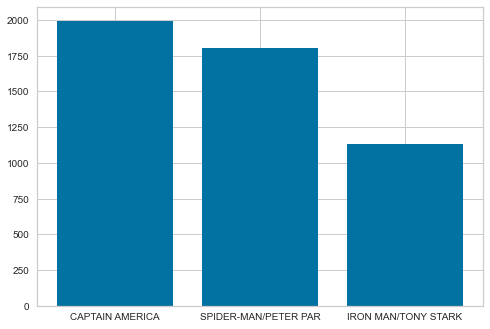

In [62]:
#abbiamo inserito 3 come N perche senno i nomi vengono tutti attaccati
plot_sort_hero = sorted(collaborations(G1,1,3).items(), key=lambda x: x[1], reverse = True)

# Make a random dataset:
height = [t[1] for t in plot_sort_hero]
bars = [t[0] for t in plot_sort_hero]
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

**V1.4 A plot depicting the number of heroes who appeared in each comic, sorted in descending order (if the graph is type 2)**

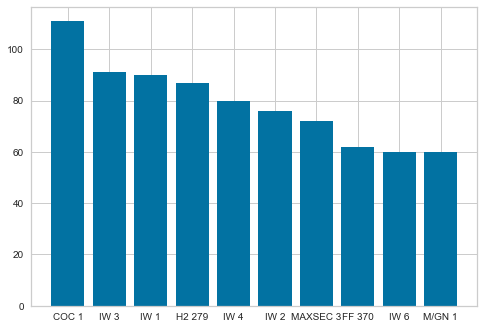

In [74]:
#abbiamo messo 10 come N perche senno si sovrapponevano i nomi
plot_sort_comic = sorted(heros_per_comic(G2, 2, 10).items(), key=lambda x: x[1], reverse = True)


# Make a random dataset:
height = [t[1] for t in plot_sort_comic]
bars = [t[0] for t in plot_sort_comic]
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

**V1.5 A plot depicting the degree distribution of the network**

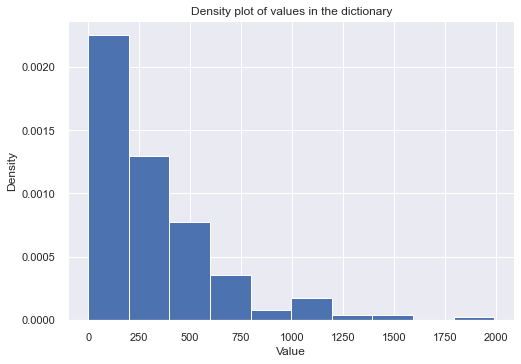

In [92]:
#QUESTO PENSO SIA SBAGLIATO... NON MI TORNANO I VALORI, RICONTROLLA
values = list(distribution(G1))

# Plot the density graph
plt.hist(values, density=True, bins=10)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density plot of values in the dictionary')
plt.show()

In [84]:
distribution(G1)

{1: 95,
 2: 121,
 3: 135,
 4: 174,
 5: 209,
 6: 215,
 7: 224,
 8: 239,
 9: 241,
 10: 260,
 11: 246,
 12: 225,
 13: 199,
 14: 183,
 15: 175,
 16: 148,
 17: 140,
 18: 139,
 19: 124,
 20: 108,
 21: 127,
 22: 121,
 23: 88,
 24: 74,
 25: 104,
 26: 81,
 27: 82,
 28: 59,
 29: 57,
 30: 70,
 31: 68,
 32: 61,
 33: 54,
 34: 43,
 35: 52,
 36: 41,
 37: 52,
 38: 63,
 39: 63,
 40: 38,
 41: 54,
 42: 36,
 43: 34,
 44: 44,
 45: 39,
 46: 30,
 47: 35,
 48: 43,
 49: 33,
 50: 31,
 51: 36,
 52: 23,
 53: 23,
 54: 27,
 55: 26,
 56: 16,
 57: 17,
 58: 25,
 59: 22,
 60: 28,
 61: 22,
 62: 16,
 63: 25,
 64: 17,
 65: 19,
 66: 12,
 67: 23,
 68: 16,
 69: 16,
 70: 22,
 71: 15,
 72: 16,
 73: 15,
 74: 10,
 75: 17,
 76: 18,
 77: 18,
 78: 8,
 79: 13,
 80: 14,
 81: 14,
 82: 13,
 83: 11,
 84: 11,
 85: 18,
 86: 12,
 87: 14,
 88: 18,
 89: 19,
 90: 10,
 91: 7,
 92: 10,
 93: 10,
 94: 4,
 95: 7,
 96: 6,
 97: 7,
 98: 7,
 99: 5,
 100: 9,
 101: 7,
 102: 7,
 103: 9,
 104: 5,
 105: 8,
 106: 11,
 107: 6,
 108: 10,
 109: 3,
 110: 6,
 11

<AxesSubplot:ylabel='Density'>

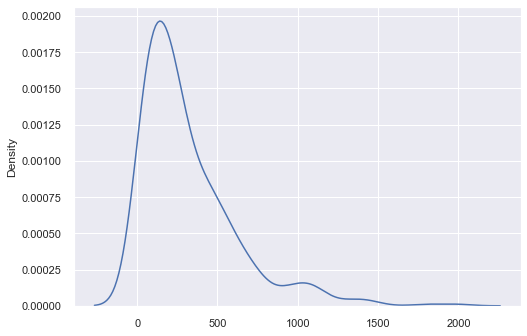

In [93]:
#POTREI FARE ANCHE QUESTO
values = list(distribution(G1))

# Plot the density curve
sns.kdeplot(values)

C:\Users\gianl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

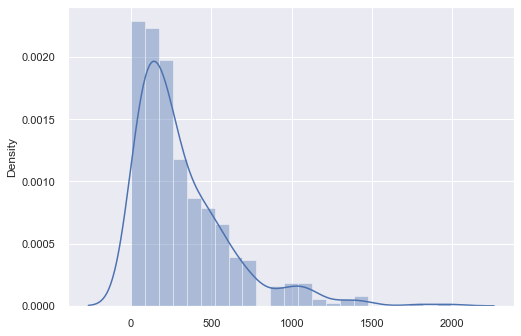

In [95]:
#OPPURE QUESTO
values = list(distribution(G1))

# Plot the density curve and histogram
sns.distplot(values)

## Visualization 2 - Visualize centrality measures

In [ ]:
df_vis2 = pd.DataFrame()

In [ ]:
names_centralities = ['Betweenness', 'PageRank', 'Closeness', 'DegreeCentrality']
avg_centralities = [avg_centrality_bet, avg_centrality_pr, avg_centrality_cl, avg_centrality_deg]
centralities_node = [centrality_node_bet, centrality_node_pr, centrality_node_cl, centrality_node_deg]

In [ ]:
df_vis2['Centrality'] = names_centralities

In [ ]:
df_vis2['Avg Centrality'] = avg_centralities

In [ ]:
df_vis2['Nodes centrality'] = centralities_node

In [ ]:
df_vis2

## Visualization 3 - Visualize the shortest-ordered route

## Visualization 4 - Visualize the disconnected graph

#### First request

In [ ]:
# Example
disconnectGraph(G_fun4, 'CAPTAIN AMERICA', 'SPIDER-MAN/PETER PARKER', 1000)

#### Second request: before disconnecting graph

In [ ]:
# Takes a while to run
plt.plot()
nx.draw(G_fun4)
plt.show()

#### Third request: after disconnecting graph

To disconnect the graph, we need to remove the edge (for one of the two nodes) that connects the nodes to a common node (which is a 'comic' node).
This way we create two subgraphs for the two heros.

In [ ]:
def disconnectGraphPlot(G, heroA, heroB, N=ln_N):
    """
    INPUT:
    'G' is the graph data
    'heroA' is the superhero to which will relate sub-graph G_a
    'heroB' is the superhero to which will relate sub-graph G_b
    'N' is the number of top heros that we consider for our calculations
    
    OUTPUT:
    The graph divided into the two subgraphs
    """
    
    G_top_N = topNsuperherosGraph(G, N)
    
    if heroA in G_top_N.nodes() and heroB in G_top_N.nodes():
        edges_A = list(G_top_N.edges(heroA))
        edges_B = list(G_top_N.edges(heroB))
        for i in edges_A:
            for j in edges_B:
                if i[1] == j[1]:
                    G_top_N.remove_edge(i[0], i[1])
                
    return G_top_N

In [ ]:
disconnectedGraph = disconnectGraphPlot(G_fun4, 'CAPTAIN AMERICA', 'SPIDER-MAN/PETER PARKER', 100)

In [ ]:
plt.plot()
nx.draw(disconnectedGraph, with_labels=True)
plt.show()